In [35]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import pandas as pd
import os
import re

# Funzione per estrarre i numeri dal nome del file
def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else 0

# Cartella dove sono salvati i file CSV (usa '.' per la cartella corrente)
directory = "./output"

# Lista dei file CSV nella cartella corrente
file_list = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Ordina i file in base ai numeri estratti dai nomi dei file
file_list.sort(key=extract_number)

# Creare una lista per memorizzare i DataFrame modificati
modified_df_list = []

# Iterare su file_list e aggiungere una colonna 'File' con l'indice del file
for idx, file in enumerate(file_list, start=1):
    df = pd.read_csv(f"./output/{file}")
    df['File'] = idx  # Aggiungi la colonna 'File' con l'indice corrente
    modified_df_list.append(df[['File', 'Model', 'Time', 'Optimal', 'Objective']])  # Mantieni solo le colonne desiderate

# Concatenare tutti i DataFrame in un unico DataFrame
final_df = pd.concat(modified_df_list, ignore_index=True)

# Visualizzare il DataFrame finale
print(final_df)


     File                  Model  Time  Optimal  Objective
0       1                   base     0     True         14
1       1                base_sb     0     True         14
2       1            base_new_UB     0     True         14
3       1         base_new_UB_sb     0     True         14
4       1            base_linear     0     True         14
5       1         base_linear_sb     0     True         14
6       1     base_new_UB_linear     0     True         14
7       1  base_new_UB_linear_sb     0     True         14
8       1                    seq     0     True         14
9       1                 seq_sb     0     True         14
10      1             seq_new_UB     0     True         14
11      1          seq_new_UB_sb     0     True         14
12      2                   base    32     True        226
13      2                base_sb     9     True        226
14      2            base_new_UB    94     True        226
15      2         base_new_UB_sb     4     True        2

In [37]:
df = final_df

In [44]:

df.head(120)

,File,Model,Time,Optimal,Objective
0,1,base,0,True,14
1,1,base_sb,0,True,14
2,1,base_new_UB,0,True,14
3,1,base_new_UB_sb,0,True,14
4,1,base_linear,0,True,14
5,1,base_linear_sb,0,True,14
6,1,base_new_UB_linear,0,True,14
7,1,base_new_UB_linear_sb,0,True,14
8,1,seq,0,True,14
9,1,seq_sb,0,True,14


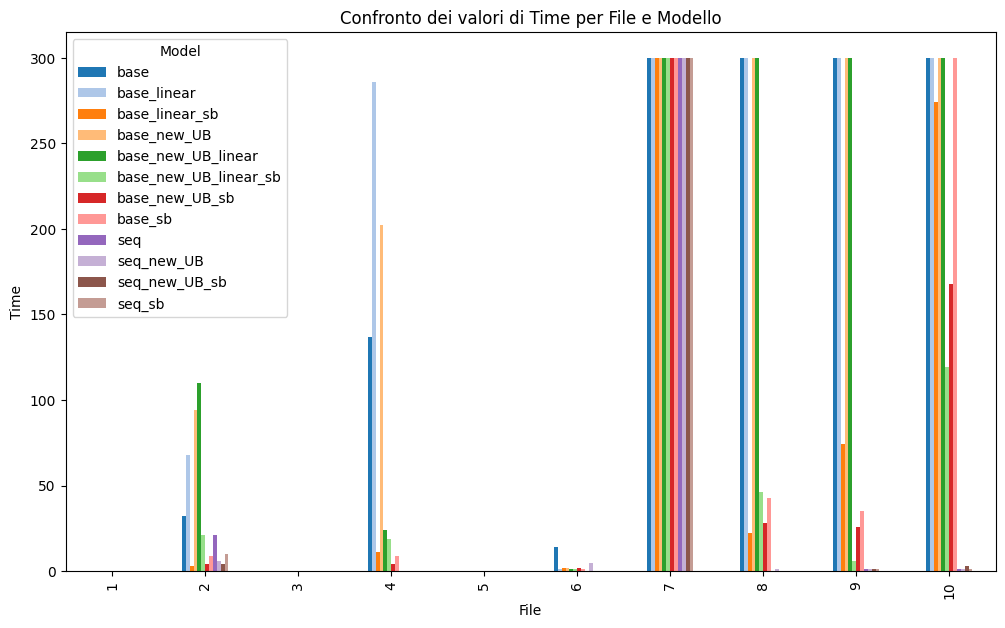

In [ ]:
pivot_df_t = df.pivot(index='File', columns='Model', values='Time')

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
if len(colors) < len(pivot_df_t.columns):
    colors = plt.cm.tab20.colors  # Automatically handle more colors
ax = pivot_df_t.plot(kind='bar', figsize=(12, 7), color=colors[:len(pivot_df_t.columns)])
# Creazione del grafico a barre raggruppate

# Etichette e titolo del grafico
plt.xlabel('File')
plt.ylabel('Time')
plt.title('Confronto dei valori di Time per File e Modello')
plt.legend(title='Model')

# Mostra il grafico
plt.show()

In [ ]:
df['Objective'] = pd.to_numeric(df['Objective'], errors='coerce')


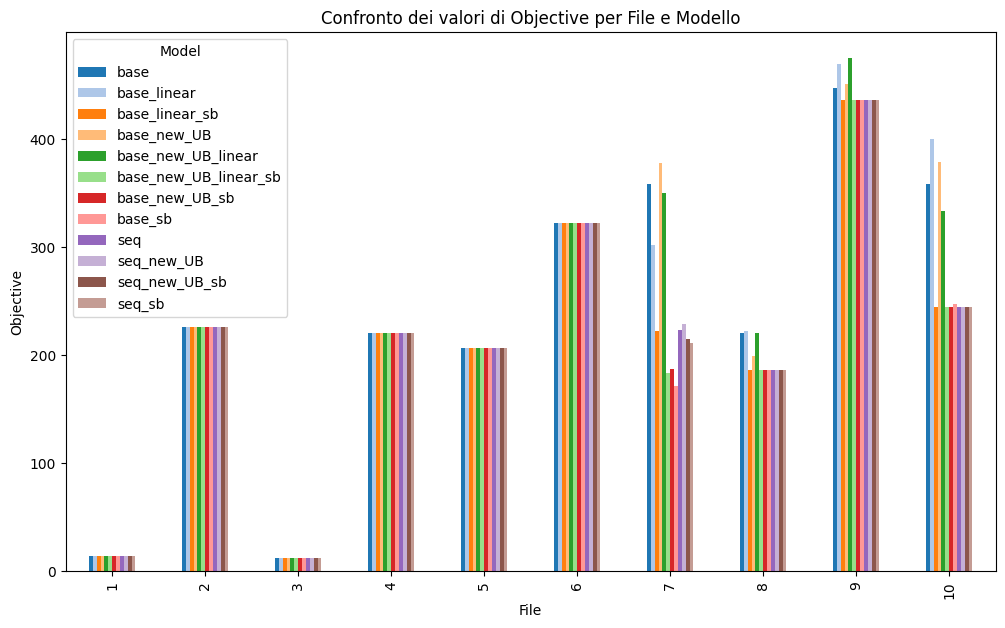

In [ ]:
pivot_df = df.pivot(index='File', columns='Model', values='Objective')

# Creazione del grafico a barre raggruppate
# Definisci i colori
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
if len(colors) < len(pivot_df.columns):
    colors = plt.cm.tab20.colors  # Automatically handle more colors
ax = pivot_df.plot(kind='bar', figsize=(12, 7), color=colors[:len(pivot_df.columns)])

# Etichette e titolo del grafico
plt.xlabel('File')
plt.ylabel('Objective')
plt.title('Confronto dei valori di Objective per File e Modello')
plt.legend(title='Model')

# Mostra il grafico
plt.show()

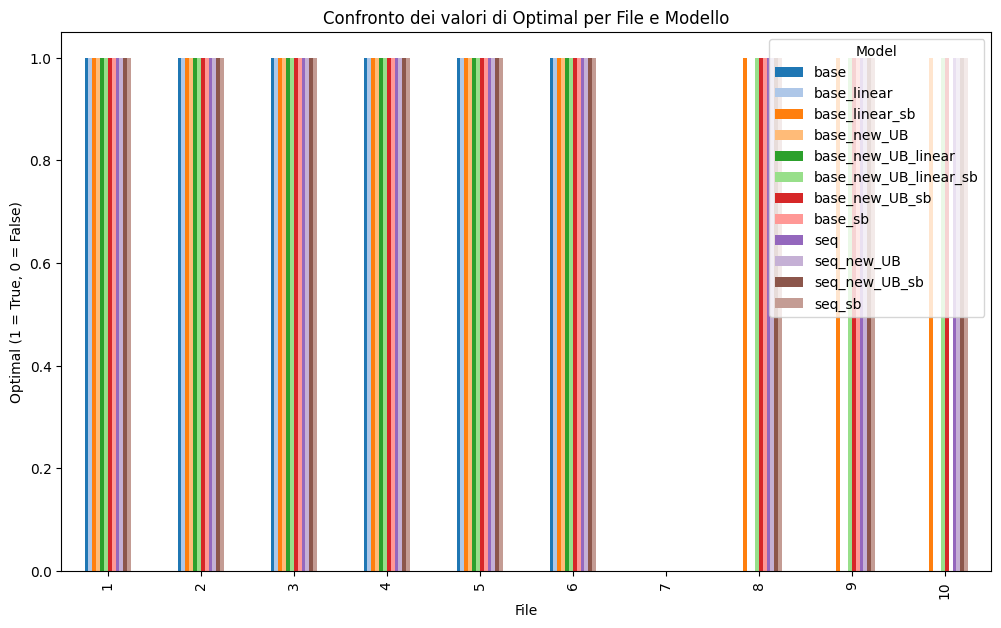

In [ ]:
df['Optimal'] = df['Optimal'].astype(bool)

# Pivot della tabella
pivot_df = df.pivot(index='File', columns='Model', values='Optimal')

# Converti i valori booleani in numeri
pivot_df_numeric = pivot_df.astype(int)

# Definisci i colori
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
if len(colors) < len(pivot_df_numeric.columns):
    colors = plt.cm.tab20.colors  # Automatically handle more colors

# Crea il grafico
ax = pivot_df_numeric.plot(kind='bar', figsize=(12, 7), color=colors[:len(pivot_df_numeric.columns)])

# Etichette e titolo
plt.xlabel('File')
plt.ylabel('Optimal (1 = True, 0 = False)')
plt.title('Confronto dei valori di Optimal per File e Modello')
plt.legend(title='Model')

# Mostra il grafico
plt.show()

In [38]:
import time

from z3 import *

from utils import *
from encoding import *


def seq_model(m, n, l, s, D, symmetry_breaking=True, implied_constraint=True, search='Linear', display_solution=False, timeout_duration=300, UB=True):
    """Model 2 in Z3 for the Multiple Couriers Planning problem, with the same constraints of Model 1 but using 2 solvers: one to find the
       assignments and the other one to find the respective routes of each one, i.e. clearly separating the "cluster-first" and "order-second" phases

    Args:
        m (int): number of couriers
        n (int): number of items to deliver
        l (list[int]): l[i] represents the maximum load of courier i, for i = 1..m
        s (list[int]): s[j] represents the size of item j, for j = 1..n
        D (list[list[int]]): (n+1)x(n+1) matrix, with D[i][j] representing the distance from
                             distribution point i to distribution point j
        symmetry_breaking (bool, optional): wether or not to use symmetry breaking constraints (default=True)
        implied_constraint (bool, optional): wether or not to use implied constraint (default=True)
        search (str, optional) ['Linear']: the search strategy to use in the Optimization phase of solving. This model supports only linear search (default='Linear')
        display_solution (bool, optional): wether or not to print the final solution obtained, with the path travelled by each courier (default=True)
        timeout_duration (int, optional): timeout in seconds (default=300)

    """
    start_time = time.time()

    ## VARIABLES

    # a for assignments
    a = [[Bool(f"a_{i}_{j}") for j in range(n)] for i in range(m)]
    # a_ij = 1 indicates that courier i delivers object j

    # r for routes
    r = [[[Bool(f"r_{i}_{j}_{k}") for k in range(n+1)] for j in range(n+1)] for i in range(m)]
    # r_ijk = 1 indicates that courier i moves from delivery point j to delivery point k in his route
    # n+1 delivery points because considering Origin point as well, representes as n+1-th row and column

    # t for times
    t = [[Bool(f"deliver_{j}_as_{k}-th") for k in range(n)] for j in range(n)]
    # t_jk == 1 iff object j is delivered as k-th in its courier's route (intuition of time)

    courier_loads = [[Bool(f"cl_{i}_{k}") for k in range(num_bits(sum(s)))] for i in range(m)]
    # courier_loads_i = binary representation of actual load carried by each courier

    # Conversions:
    s_bin = [int_to_bin(s_j, num_bits(s_j)) for s_j in s]
    l_bin = [int_to_bin(l_i, num_bits(l_i)) for l_i in l]

    # Bounds on objective function
    # distances[i] := binary representation of the distance travelled by courier i
    # Take as upper bound the greater n-(m-1) maximum distances, since that's the maximum items a single courier can be assigned to
    max_distances = [max(D[i]) for i in range(n+1)] 
    max_distances.sort()

    # Decision of upper bound
    if UB:
        upper_bound = int(upperBound(np.array(D),l,s))
    else:
        upper_bound = sum(max_distances[m-1:])
    lower_bound = max([D[n][j] + D[j][n] for j in range(n)])

    if symmetry_breaking:
        # sort the list of loads, keeping the permutation used for later
        L = [(l[i], i) for i in range(m)]
        L.sort(reverse=True)
        l, permutation = zip(*L)
        l = list(l)
        permutation = list(permutation)


    # flatten r and D
    flat_r = [flatten(r[i]) for i in range(m)]
    flat_D = flatten(D)
    # convert flat_D to binary
    flat_D_bin = [int_to_bin(e, num_bits(e) if e > 0 else 1) for e in flat_D]

    distances = [[Bool(f"dist_bin_{i}_{k}") for k in range(num_bits(upper_bound))] for i in range(m)]


    def assignments_constraints():
        clauses = []

        # Constraint 1: every object is assigned to one and only one courier
        for j in range(n):
            clauses.append(exactly_one_seq([a[i][j] for i in range(m)], f"assignment_{j}"))

        # Constraint 2: every courier can't exceed its load capacity
        for i in range(m):
            clauses.append(conditional_sum_K_bin(a[i], s_bin, courier_loads[i], f"compute_courier_load_{i}"))
            clauses.append(leq(courier_loads[i], l_bin[i]))

        # Constraint 3: every courier has at least 1 item to deliver (implied constraint, because n >= m and distance is quasimetric)
        if implied_constraint:
            for i in range(m):
                clauses.append(at_least_one(a[i]))

        return And(clauses)


    def routes_constraints():
        clauses = []

        # Constraint 4: every object is delivered at some time in its courier's route, and only once
        for i in range(n):
            clauses.append(exactly_one_seq(t[i], f"time_of_{i}"))

        # Constraint 5: routes
        for i in range(m):
            # Constraint 5.1: diagonal is full of zeros, i.e. can't leave from j to go to j
            clauses.append(And([Not(r[i][j][j]) for j in range(n)]))

            for j in range(n):
                clauses.append(Implies(a[i][j], exactly_one_seq(r[i][j], f"courier_{i}_leaves_{j}")))  # If a_ij then exactly_one(r_ij)
                clauses.append(Implies(Not(a[i][j]), all_false(r[i][j])))   # else all_false(r_ij)
            clauses.append(exactly_one_seq(r[i][n], f"courier_{i}_leaves_origin"))    # exactly_one in origin point row === courier i leaves from origin

            # Constraint 5.3: column j has a 1 iff courier i delivers object j
            # columns
            for k in range(n):
                clauses.append(Implies(a[i][k], exactly_one_seq([r[i][j][k] for j in range(n+1)], f"courier_{i}_reaches_{k}")))  # If a_ij then exactly_one(r_i,:,k)
                clauses.append(Implies(Not(a[i][k]), all_false([r[i][j][k] for j in range(n+1)])))   # else all_false(r_i,:,k)
            clauses.append(exactly_one_seq([r[i][j][n] for j in range(n+1)], f"courier_{i}_returns_to_origin"))         # exactly_one in origin point column === courier i returns to origin

            # Constraint 5.4: use ordering between t_j and t_k in every edge travelled
            # in order to avoid loops not containing the origin
            for j in range(n):
                for k in range(n):
                    clauses.append(Implies(r[i][j][k], successive(t[j], t[k])))
                clauses.append(Implies(r[i][n][j], t[j][0]))

        # definition of distances using constraints
        for i in range(m):
            clauses.append(conditional_sum_K_bin(flat_r[i], flat_D_bin, distances[i], f"distances_def_{i}"))

        return And(clauses)



    ## OPTIMIZATION SEARCH

    model_assignments = None
    model_routes = None
    obj_value = None
    exit_flag = False



    solver_assignments = Solver()
    solver_routes = Solver()

    sub_constraints = assignments_constraints()
    solver_assignments.add(sub_constraints)
    solver_routes.add(sub_constraints)

    master_constraints = routes_constraints()
    solver_routes.add(master_constraints)

    encoding_time = time.time()
    timeout = encoding_time + timeout_duration
    # print(f"Encoding finished at time {round(encoding_time - start_time, 1)}s, now start solving/optimization search")


    if search == 'Linear':
        solver_routes.push()

        upper_bound_bin = int_to_bin(upper_bound, num_bits(upper_bound))
        upper_bound_constraint = AllLessEq_bin(distances, upper_bound_bin)

        solver_assignments.set('timeout', millisecs_left(time.time(), timeout))
        while solver_assignments.check() == z3.sat and not exit_flag:
            # print(f"Found a valid A after {round(time.time() - encoding_time, 1)}s")

            model_assignments = solver_assignments.model()

            solver_routes.push()
            # impose the found assignments on the master problem
            for i in range(m):
                for j in range(n):
                    solver_routes.add(a[i][j] == model_assignments.evaluate(a[i][j]))

            solver_routes.push()
            solver_routes.add(upper_bound_constraint)

            now = time.time()
            if now >= timeout:
                break
            solver_routes.set('timeout', millisecs_left(now, timeout))
            while solver_routes.check() == z3.sat:

                model_routes = solver_routes.model()

                obj_value = obj_function(model_routes, distances)
                # print(f"This model obtained objective value: {obj_value} after {round(time.time() - encoding_time, 1)}s")

                if obj_value <= lower_bound:
                    exit_flag = True
                    break

                upper_bound = obj_value - 1
                upper_bound_bin = int_to_bin(upper_bound, num_bits(upper_bound))
                upper_bound_constraint = AllLessEq_bin(distances, upper_bound_bin)

                solver_routes.pop()
                solver_routes.push()

                solver_routes.add(upper_bound_constraint)

                now = time.time()
                if now >= timeout:
                    exit_flag = True
                    break
                solver_routes.set('timeout', millisecs_left(now, timeout))

            solver_routes.pop()     # remove the latest found upper-bound constraint frame
            solver_routes.pop()     # remove the assignments constraint frame

            # force at least one difference in the assignments matrix 'a' w.r.t the last matrix of assignments found
            solver_assignments.add(Or([Not(a[i][j]) if model_assignments.evaluate(a[i][j]) else a[i][j] for i in range(m) for j in range(n)]))

            now = time.time()
            if now >= timeout:
                break
            solver_assignments.set('timeout', millisecs_left(now, timeout))

    elif search == 'Binary':
        raise ValueError(f'Binary search is not supported for sequential model, but parameter was set search={search}')

    else:
        raise ValueError(f"Input parameter [search] mush be either 'Linear' or 'Binary', was given '{search}'")


    # compute time taken
    end_time = time.time()
    print(f"end after {end_time}, res {obj_value}")

    if end_time >= timeout:
        solving_time = timeout_duration    # solving_time has upper bound of timeout_duration if it timeouts
    else:
        solving_time = math.floor(end_time - encoding_time)

    # if no model is found -> UNSAT if solved to optimality else UNKKNOWN
    if model_routes is None:
        ans = "N/A" if solving_time == timeout_duration else "UNSAT"
        return (ans, solving_time)
    
    # reorder all variables w.r.t. the original permutation of load capacities, i.e. of couriers
    A = evaluate(model_routes, a)
    print(A)
    

    if symmetry_breaking:
        a_copy = copy.deepcopy(a)
        r_copy = copy.deepcopy(r)
        for i in range(m):
            a[permutation[i]] = a_copy[i]
            r[permutation[i]] = r_copy[i]

    # check that all couriers travel hamiltonian cycles
    R = evaluate(model_routes, r)
    assert(check_all_hamiltonian(R))

    T = evaluate(model_routes, t)
    A = evaluate(model_routes, a)

    print(s)
    print(l)
    print(A)

    Dists = evaluate(model_routes, distances)
    displayMCP(T, Dists, obj_value, A)

    route = retrieve_routes(T, A)
    return (obj_value, solving_time, route)

In [39]:
with open("C:/Users/andre/Desktop/AlmaMater/Optimization/Exercise/SAT/SAT/instances/inst05.dat", 'r') as file:
    lines = file.readlines()

# Data
m = int(lines[0].strip())  # couriers
n = int(lines[1].strip())  # obj
l = list(map(int, lines[2].strip().split()))  # loads
s = list(map(int, lines[3].strip().split()))  # size

# Distances
D = []
for i in range(4, 4 + n + 1):
    D.append(list(map(int, lines[i].strip().split())))

#print(m,n,l,s,D)

seq_model(m, n, l, s, D, search="Linear", symmetry_breaking=True, UB=True)

full courier 0 at 0 with l= 0
full courier 1 at 59 with l= 20
[[a_0_0, a_0_1, a_0_2], [a_1_0, a_1_1, a_1_2]]
end after 1725154670.0710342, res 206
[[0, 1, 0], [1, 0, 1]]
[20, 17, 6]
[30, 18]
[[1, 0, 1], [0, 1, 0]]
-----------Objective value: 206-----------
------------------Routes-----------------
Origin --> 1 --> 3 --> Origin: travelled 160
Origin --> 2 --> Origin: travelled 206


(206, 0, [[1, 3], [2]])